In [2]:
import math
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from statistics import mean, mode
import pandas as pd
import medical_lib as ml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from xgboost.core import Booster
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

Einlesen der Daten

In [3]:
medData = pd.read_csv('naive_latest_model1v2_TMP.csv') #naive_latest_model1v2_TMP
medDataCopy = medData.copy()
medDataCopy = medDataCopy.iloc[:, 3:]
medDataCopy_model2_Features_Selected = medDataCopy.copy()

med_class = medDataCopy.iloc[:, -1]
med_features = medDataCopy.iloc[:, :-1]

# Aufteilen der Daten in 4 Untersets
med_features_train, med_features_test, med_class_train, med_class_test = train_test_split(med_features, med_class, test_size=0.2, random_state=43, stratify=med_class)
med_class_test_array = np.array(med_class_test)

result = pd.read_csv('automated_algorithmen.csv')
result = result.iloc[:, 1:]

KNN

In [4]:
medKNN = KNeighborsClassifier(n_neighbors=8)
medKNN.fit(med_features_train,med_class_train)
knnYpred = medKNN.predict(med_features_test)
accuracyKNN = accuracy_score(med_class_test, knnYpred)
precisionKNN = precision_score(med_class_test, knnYpred)
recallKNN = recall_score(med_class_test, knnYpred)
f1scoreKNN = f1_score(med_class_test, knnYpred)
print('KNN Accuracy: ', accuracyKNN, 'KNN Precision: ', precisionKNN, 'KNN Recall: ', recallKNN, 'KNN F1-Score: ', f1scoreKNN )
print('#################################################################################################')
# ###########################################################################################################################
# ###########################################################################################################################
# # Jetzt mit n-fold Cross-Validation
print('10-Fold KNN')
medical_KFOLD_KNN = KNeighborsClassifier(n_neighbors=8)
# Training mit n-foldaccuracyKNN_CV, precisionKNN_CV, recallKNN_CV, f1scoreKNN_CV
accuracyKNN_CV = cross_val_score(medical_KFOLD_KNN, med_features, med_class, cv=10, scoring='accuracy')
precisionKNN_CV = cross_val_score(medical_KFOLD_KNN, med_features, med_class, cv=10, scoring='precision')
recallKNN_CV = cross_val_score(medical_KFOLD_KNN, med_features, med_class, cv=10, scoring='recall')
f1scoreKNN_CV = cross_val_score(medical_KFOLD_KNN, med_features, med_class, cv=10, scoring='f1')
meanAccuracyKNN_CV = np.mean(accuracyKNN_CV)
meanPrecisionKNN_CV = np.mean(precisionKNN_CV)
meanRecallKNN_CV = np.mean(recallKNN_CV)
meanF1scoreKNN_CV = np.mean(f1scoreKNN_CV)
print('10-Fold KNN Accuracy: ', meanAccuracyKNN_CV, '10-Fold KNN Precision: ', meanPrecisionKNN_CV, '10-Fold KNN Recall: ', meanRecallKNN_CV, '10-Fold KNN F1-Score: ', meanF1scoreKNN_CV )
index = result.index[result['Modellierung'] == 'Model_1_version_2'].tolist()
result.at[index, 'KNN_precision'] = meanPrecisionKNN_CV
result.at[index, 'KNN_recall'] = meanRecallKNN_CV
result.at[index, 'KNN_f1'] = meanF1scoreKNN_CV
result.to_csv('automated_algorithmen.csv')

KNN Accuracy:  0.6818181818181818 KNN Precision:  0.6666666666666666 KNN Recall:  0.7272727272727273 KNN F1-Score:  0.6956521739130435
#################################################################################################
10-Fold KNN
10-Fold KNN Accuracy:  0.7363636363636363 10-Fold KNN Precision:  0.7713170163170162 10-Fold KNN Recall:  0.6818181818181819 10-Fold KNN F1-Score:  0.7186573152248209


Logistic Regression

In [5]:
lr_model = LogisticRegression()
lr_model.fit(med_features_train, med_class_train)
lr_y_pred = lr_model.predict(med_features_test)
lr_accuracyLogReg = accuracy_score(med_class_test, lr_y_pred)
lr_precisionLogReg = precision_score(med_class_test, lr_y_pred)
lr_recallLogReg = recall_score(med_class_test, lr_y_pred)
lr_f1scoreLogReg = f1_score(med_class_test, lr_y_pred)
print('Log-Regression Accuracy: ', lr_accuracyLogReg, 'Log-Regression Precision: ', lr_precisionLogReg, 'Log-Regression Recall: ', lr_recallLogReg, 'Log-Regression F1-Score: ', lr_f1scoreLogReg )
print('#################################################################################################')


# # 10-Fold Logistic Regression:
print('10-Fold Logistic Regression')
print('')
medical_KFOLD_LogReg = LogisticRegression()
accuracyLogReg_CV = cross_val_score(medical_KFOLD_LogReg, med_features, med_class, cv=10, scoring='accuracy')
precisionLogReg_CV = cross_val_score(medical_KFOLD_LogReg, med_features, med_class, cv=10, scoring='precision')
recallLogReg_CV = cross_val_score(medical_KFOLD_LogReg, med_features, med_class, cv=10, scoring='recall')
f1scoreLogReg_CV = cross_val_score(medical_KFOLD_LogReg, med_features, med_class, cv=10, scoring='f1')
meanAccuracyLogReg_CV = np.mean(accuracyLogReg_CV)
meanPrecisionLogReg_CV = np.mean(precisionLogReg_CV)
meanRecallLogReg_CV = np.mean(recallLogReg_CV)
meanF1scoreLogReg_CV = np.mean(f1scoreLogReg_CV)
print('10-Fold LogReg Accuracy: ', meanAccuracyLogReg_CV, '10-Fold LogReg Precision: ', meanPrecisionLogReg_CV, '10-Fold LogReg Recall: ', meanRecallLogReg_CV, '10-Fold LogReg F1-Score: ', meanF1scoreLogReg_CV )
index = result.index[result['Modellierung'] == 'Model_1_version_2'].tolist()
result.at[index, 'Logistic_Regression_precision'] = meanPrecisionLogReg_CV
result.at[index, 'Logistic_Regression_recall'] = meanRecallLogReg_CV
result.at[index, 'Logistic_Regression_f1'] = meanF1scoreLogReg_CV
result.to_csv('automated_algorithmen.csv')

Log-Regression Accuracy:  0.6590909090909091 Log-Regression Precision:  0.6296296296296297 Log-Regression Recall:  0.7727272727272727 Log-Regression F1-Score:  0.6938775510204083
#################################################################################################
10-Fold Logistic Regression

10-Fold LogReg Accuracy:  0.75 10-Fold LogReg Precision:  0.800784770784771 10-Fold LogReg Recall:  0.6909090909090909 10-Fold LogReg F1-Score:  0.7295517202096149


Decision Tree

In [6]:
medical_DecTree = DecisionTreeClassifier(random_state=43)
medical_DecTree = medical_DecTree.fit(med_features_train, med_class_train)
decTree_pred = medical_DecTree.predict(med_features_test)
accuracyDecTree = accuracy_score(med_class_test, decTree_pred)
precisionDecTree = precision_score(med_class_test, decTree_pred)
recallDecTree = recall_score(med_class_test, decTree_pred)
f1scoreDecTree = f1_score(med_class_test, decTree_pred)
print('medical_DecTree Accuracy: ', accuracyDecTree, 'DecTree Precision: ', precisionDecTree, 'DecTree Recall: ', recallDecTree, 'DecTree F1-Score: ', f1scoreDecTree )
print('#################################################################################################')

#10-Fold Decision Tree
print('10-Fold Decision Tree')
medical_KFOLD_DecTree = DecisionTreeClassifier(random_state=43)
accuracyDecTree_CV = cross_val_score(medical_KFOLD_DecTree, med_features, med_class, cv=10, scoring='accuracy')
precisionDecTree_CV = cross_val_score(medical_KFOLD_DecTree, med_features, med_class, cv=10, scoring='precision')
recallDecTree_CV = cross_val_score(medical_KFOLD_DecTree, med_features, med_class, cv=10, scoring='recall')
f1scoreDecTree_CV = cross_val_score(medical_KFOLD_DecTree, med_features, med_class, cv=10, scoring='f1')
meanAccuracyDecTree_CV = np.mean(accuracyDecTree_CV)
meanPrecisionDecTree_CV = np.mean(precisionDecTree_CV)
meanRecallDecTree_CV = np.mean(recallDecTree_CV)
meanF1scoreDecTree_CV = np.mean(f1scoreDecTree_CV)
print('10-Fold DecTree Accuracy: ', meanAccuracyDecTree_CV, '10-Fold DecTree Precision: ', meanPrecisionDecTree_CV, '10-Fold DecTree Recall: ', meanRecallDecTree_CV, '10-Fold DecTree F1-Score: ', meanF1scoreDecTree_CV )
index = result.index[result['Modellierung'] == 'Model_1_version_2'].tolist()
result.at[index, 'Decision_Tree_precision'] = meanPrecisionDecTree_CV
result.at[index, 'Decision_Tree_recall'] = meanRecallDecTree_CV
result.at[index, 'Decision_Tree_f1'] = meanF1scoreDecTree_CV
result.to_csv('automated_algorithmen.csv')

medical_DecTree Accuracy:  0.7045454545454546 DecTree Precision:  0.68 DecTree Recall:  0.7727272727272727 DecTree F1-Score:  0.7234042553191491
#################################################################################################
10-Fold Decision Tree
10-Fold DecTree Accuracy:  0.7727272727272727 10-Fold DecTree Precision:  0.788997668997669 10-Fold DecTree Recall:  0.7545454545454546 10-Fold DecTree F1-Score:  0.7658837805977394


Random Forest

In [7]:
medical_RF = RandomForestClassifier(random_state=43)
medical_RF.fit(med_features_train, med_class_train)
rfPred = medical_RF.predict(med_features_test)
accuracyRF = accuracy_score(med_class_test, rfPred)
precisionRF = precision_score(med_class_test, rfPred)
recallRF = recall_score(med_class_test, rfPred)
f1scoreRF = f1_score(med_class_test, rfPred)
print('Anzahl Estimator: 100 ', 'RF Accuracy: ', accuracyRF, 'RF Precision: ', precisionRF, 'RF Recall: ', recallRF, 'RF F1-Score: ', f1scoreRF )
print('#################################################################################################')

# 10-Fold Random Forest
print('10-Fold Random Forest')
medical_KFOLD_RF = RandomForestClassifier(random_state=43)
accuracyRF_CV = cross_val_score(medical_KFOLD_RF, med_features, med_class, cv=10, scoring='accuracy')
precisionRF_CV = cross_val_score(medical_KFOLD_RF, med_features, med_class, cv=10, scoring='precision')
recallRF_CV = cross_val_score(medical_KFOLD_RF, med_features, med_class, cv=10, scoring='recall')
f1scoreRF_CV = cross_val_score(medical_KFOLD_RF, med_features, med_class, cv=10, scoring='f1')
meanAccuracyRF_CV = np.mean(accuracyRF_CV)
meanPrecisionRF_CV = np.mean(precisionRF_CV)
meanRecallRFCV = np.mean(recallRF_CV)
meanF1scoreRF_CV = np.mean(f1scoreRF_CV)
print('10-Fold RF Accuracy: ', meanAccuracyRF_CV, '10-Fold RF Precision: ', meanPrecisionRF_CV, '10-Fold RF Recall: ', meanRecallRFCV, '10-Fold RF F1-Score: ', meanF1scoreRF_CV )
index = result.index[result['Modellierung'] == 'Model_1_version_2'].tolist()
result.at[index, 'Random_Forest_precision'] = meanPrecisionRF_CV
result.at[index, 'Random_Forest_recall'] = meanRecallRFCV
result.at[index, 'Random_Forest_f1'] = meanF1scoreRF_CV
result.to_csv('automated_algorithmen.csv')

Anzahl Estimator: 100  RF Accuracy:  0.7727272727272727 RF Precision:  0.7142857142857143 RF Recall:  0.9090909090909091 RF F1-Score:  0.8
#################################################################################################
10-Fold Random Forest
10-Fold RF Accuracy:  0.8772727272727273 10-Fold RF Precision:  0.8384615384615385 10-Fold RF Recall:  0.9454545454545455 10-Fold RF F1-Score:  0.8874303232998886


ADABoost

In [8]:
adamodel = AdaBoostClassifier()
adamodel.fit(med_features_train, med_class_train)
adamodel_prediction = adamodel.predict(med_features_test)
adamodel_accuracy = accuracy_score(med_class_test, adamodel_prediction)
adamodel_precision = precision_score(med_class_test, adamodel_prediction)
adamodel_recall = recall_score(med_class_test, adamodel_prediction)
adamodel_f1 = f1_score(med_class_test, adamodel_prediction)
print('ADABOOST: ', 'Accuracy: ', adamodel_accuracy,'Precision: ', adamodel_precision,'Recall: ', adamodel_recall,'f1-Score: ', adamodel_f1)
index = result.index[result['Modellierung'] == 'Model_1_version_2'].tolist()
result.at[index, 'ADABoost_precision'] = adamodel_precision
result.at[index, 'ADABoost_recall'] = adamodel_recall
result.at[index, 'ADABoost_f1'] = adamodel_f1
result.to_csv('automated_algorithmen.csv')

ADABOOST:  Accuracy:  0.7045454545454546 Precision:  0.6956521739130435 Recall:  0.7272727272727273 f1-Score:  0.711111111111111


XGBoost

In [9]:
xgmodel = XGBClassifier(eval_metric='error')
xgmodel.fit(med_features_train, med_class_train)
xgboosted_prediction = xgmodel.predict(med_features_test)
xgboosted_accuracy = accuracy_score(med_class_test, xgboosted_prediction)
xgboosted_precision = precision_score(med_class_test, xgboosted_prediction)
xgboosted_recall = recall_score(med_class_test, xgboosted_prediction)
xgboosted_f1 = f1_score(med_class_test, xgboosted_prediction)
print('XGBOOST: ', 'Accuracy: ', xgboosted_accuracy, 'Precision: ', xgboosted_precision, 'Recall: ', xgboosted_recall, 'F1-Score: ', xgboosted_f1)
index = result.index[result['Modellierung'] == 'Model_1_version_2'].tolist()
result.at[index, 'XGBoost_precision'] = xgboosted_precision
result.at[index, 'XGBoost_recall'] = xgboosted_recall
result.at[index, 'XGBoost_f1'] = xgboosted_f1
result.to_csv('automated_algorithmen.csv')

XGBOOST:  Accuracy:  0.8181818181818182 Precision:  0.75 Recall:  0.9545454545454546 F1-Score:  0.84


Feature-Selection

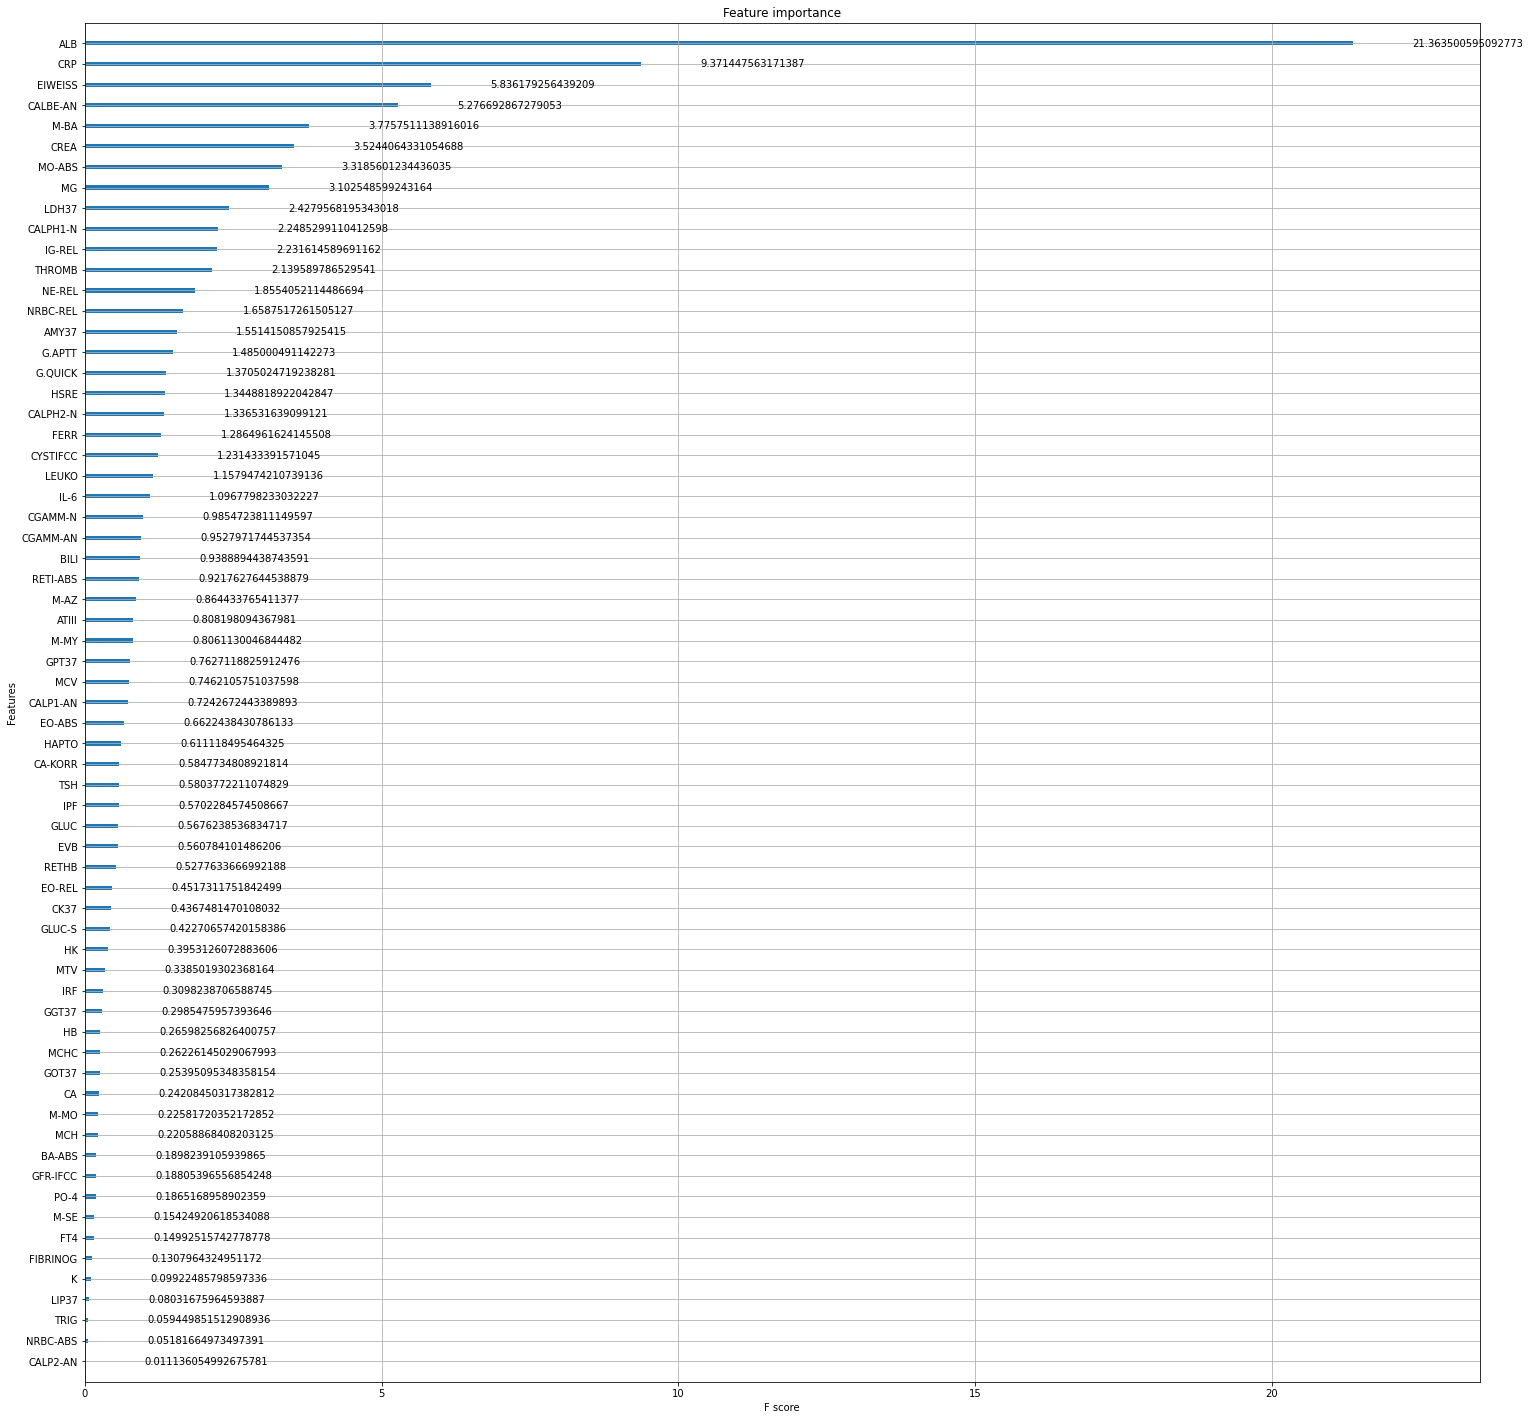

In [10]:
featureranking = sorted((value, key) for (key, value) in xgmodel.get_booster().get_score(importance_type= 'gain').items())
pyplot.rcParams['figure.figsize'] = [25,25]
plot_importance(xgmodel.get_booster().get_score(importance_type= 'gain'))
pyplot.show()
newfeatures = []
for i in range(len(featureranking)):
    if featureranking[i][0] < 1.0:
        newfeatures.append(featureranking[i][1])
# # print(newfeatures)

for el in newfeatures:
    medDataCopy.drop(el, inplace=True, axis=1)
medDataCopy.to_csv('naive_latest_model1v2_selection.csv')

Nach Feature-Selection

In [11]:
medData = pd.read_csv('naive_latest_model1v2_selection.csv') #naive_latest_model1v2_TMP
medDataCopy = medData.copy()
medDataCopy = medDataCopy.iloc[:, 1:]
medDataCopy_model2_Features_Selected = medDataCopy.copy()

med_class = medDataCopy.iloc[:, -1]
med_features = medDataCopy.iloc[:, :-1]

# Aufteilen der Daten in 4 Untersets
med_features_train, med_features_test, med_class_train, med_class_test = train_test_split(med_features, med_class, test_size=0.2, random_state=43, stratify=med_class)
med_class_test_array = np.array(med_class_test)

result = pd.read_csv('automated_algorithmen.csv')
result = result.iloc[:, 1:]

KNN

In [12]:
medKNN = KNeighborsClassifier(n_neighbors=8)
medKNN.fit(med_features_train,med_class_train)
knnYpred = medKNN.predict(med_features_test)
accuracyKNN = accuracy_score(med_class_test, knnYpred)
precisionKNN = precision_score(med_class_test, knnYpred)
recallKNN = recall_score(med_class_test, knnYpred)
f1scoreKNN = f1_score(med_class_test, knnYpred)
print('KNN Accuracy: ', accuracyKNN, 'KNN Precision: ', precisionKNN, 'KNN Recall: ', recallKNN, 'KNN F1-Score: ', f1scoreKNN )
print('#################################################################################################')
# ###########################################################################################################################
# ###########################################################################################################################
# # Jetzt mit n-fold Cross-Validation
print('10-Fold KNN')
medical_KFOLD_KNN = KNeighborsClassifier(n_neighbors=8)
# Training mit n-foldaccuracyKNN_CV, precisionKNN_CV, recallKNN_CV, f1scoreKNN_CV
accuracyKNN_CV = cross_val_score(medical_KFOLD_KNN, med_features, med_class, cv=10, scoring='accuracy')
precisionKNN_CV = cross_val_score(medical_KFOLD_KNN, med_features, med_class, cv=10, scoring='precision')
recallKNN_CV = cross_val_score(medical_KFOLD_KNN, med_features, med_class, cv=10, scoring='recall')
f1scoreKNN_CV = cross_val_score(medical_KFOLD_KNN, med_features, med_class, cv=10, scoring='f1')
meanAccuracyKNN_CV = np.mean(accuracyKNN_CV)
meanPrecisionKNN_CV = np.mean(precisionKNN_CV)
meanRecallKNN_CV = np.mean(recallKNN_CV)
meanF1scoreKNN_CV = np.mean(f1scoreKNN_CV)
print('10-Fold KNN Accuracy: ', meanAccuracyKNN_CV, '10-Fold KNN Precision: ', meanPrecisionKNN_CV, '10-Fold KNN Recall: ', meanRecallKNN_CV, '10-Fold KNN F1-Score: ', meanF1scoreKNN_CV )
index = result.index[result['Modellierung'] == 'Model_1_version_2_selected'].tolist()
result.at[index, 'KNN_precision'] = meanPrecisionKNN_CV
result.at[index, 'KNN_recall'] = meanRecallKNN_CV
result.at[index, 'KNN_f1'] = meanF1scoreKNN_CV
result.to_csv('automated_algorithmen.csv')

KNN Accuracy:  0.6818181818181818 KNN Precision:  0.6666666666666666 KNN Recall:  0.7272727272727273 KNN F1-Score:  0.6956521739130435
#################################################################################################
10-Fold KNN
10-Fold KNN Accuracy:  0.7636363636363637 10-Fold KNN Precision:  0.7864685314685314 10-Fold KNN Recall:  0.7363636363636363 10-Fold KNN F1-Score:  0.7563575935887148


Logistic Regression

In [13]:
lr_model = LogisticRegression()
lr_model.fit(med_features_train, med_class_train)
lr_y_pred = lr_model.predict(med_features_test)
lr_accuracyLogReg = accuracy_score(med_class_test, lr_y_pred)
lr_precisionLogReg = precision_score(med_class_test, lr_y_pred)
lr_recallLogReg = recall_score(med_class_test, lr_y_pred)
lr_f1scoreLogReg = f1_score(med_class_test, lr_y_pred)
print('Log-Regression Accuracy: ', lr_accuracyLogReg, 'Log-Regression Precision: ', lr_precisionLogReg, 'Log-Regression Recall: ', lr_recallLogReg, 'Log-Regression F1-Score: ', lr_f1scoreLogReg )
print('#################################################################################################')


# # 10-Fold Logistic Regression:
print('10-Fold Logistic Regression')
print('')
medical_KFOLD_LogReg = LogisticRegression()
accuracyLogReg_CV = cross_val_score(medical_KFOLD_LogReg, med_features, med_class, cv=10, scoring='accuracy')
precisionLogReg_CV = cross_val_score(medical_KFOLD_LogReg, med_features, med_class, cv=10, scoring='precision')
recallLogReg_CV = cross_val_score(medical_KFOLD_LogReg, med_features, med_class, cv=10, scoring='recall')
f1scoreLogReg_CV = cross_val_score(medical_KFOLD_LogReg, med_features, med_class, cv=10, scoring='f1')
meanAccuracyLogReg_CV = np.mean(accuracyLogReg_CV)
meanPrecisionLogReg_CV = np.mean(precisionLogReg_CV)
meanRecallLogReg_CV = np.mean(recallLogReg_CV)
meanF1scoreLogReg_CV = np.mean(f1scoreLogReg_CV)
print('10-Fold LogReg Accuracy: ', meanAccuracyLogReg_CV, '10-Fold LogReg Precision: ', meanPrecisionLogReg_CV, '10-Fold LogReg Recall: ', meanRecallLogReg_CV, '10-Fold LogReg F1-Score: ', meanF1scoreLogReg_CV )
index = result.index[result['Modellierung'] == 'Model_1_version_2_selected'].tolist()
result.at[index, 'Logistic_Regression_precision'] = meanPrecisionLogReg_CV
result.at[index, 'Logistic_Regression_recall'] = meanRecallLogReg_CV
result.at[index, 'Logistic_Regression_f1'] = meanF1scoreLogReg_CV
result.to_csv('automated_algorithmen.csv')

Log-Regression Accuracy:  0.6590909090909091 Log-Regression Precision:  0.6521739130434783 Log-Regression Recall:  0.6818181818181818 Log-Regression F1-Score:  0.6666666666666666
#################################################################################################
10-Fold Logistic Regression

10-Fold LogReg Accuracy:  0.7227272727272728 10-Fold LogReg Precision:  0.7772907647907649 10-Fold LogReg Recall:  0.6545454545454545 10-Fold LogReg F1-Score:  0.6983452851496329


Decision_Tree

In [14]:
medical_DecTree = DecisionTreeClassifier(random_state=43)
medical_DecTree = medical_DecTree.fit(med_features_train, med_class_train)
decTree_pred = medical_DecTree.predict(med_features_test)
accuracyDecTree = accuracy_score(med_class_test, decTree_pred)
precisionDecTree = precision_score(med_class_test, decTree_pred)
recallDecTree = recall_score(med_class_test, decTree_pred)
f1scoreDecTree = f1_score(med_class_test, decTree_pred)
print('medical_DecTree Accuracy: ', accuracyDecTree, 'DecTree Precision: ', precisionDecTree, 'DecTree Recall: ', recallDecTree, 'DecTree F1-Score: ', f1scoreDecTree )
print('#################################################################################################')

#10-Fold Decision Tree
print('10-Fold Decision Tree')
medical_KFOLD_DecTree = DecisionTreeClassifier(random_state=43)
accuracyDecTree_CV = cross_val_score(medical_KFOLD_DecTree, med_features, med_class, cv=10, scoring='accuracy')
precisionDecTree_CV = cross_val_score(medical_KFOLD_DecTree, med_features, med_class, cv=10, scoring='precision')
recallDecTree_CV = cross_val_score(medical_KFOLD_DecTree, med_features, med_class, cv=10, scoring='recall')
f1scoreDecTree_CV = cross_val_score(medical_KFOLD_DecTree, med_features, med_class, cv=10, scoring='f1')
meanAccuracyDecTree_CV = np.mean(accuracyDecTree_CV)
meanPrecisionDecTree_CV = np.mean(precisionDecTree_CV)
meanRecallDecTree_CV = np.mean(recallDecTree_CV)
meanF1scoreDecTree_CV = np.mean(f1scoreDecTree_CV)
print('10-Fold DecTree Accuracy: ', meanAccuracyDecTree_CV, '10-Fold DecTree Precision: ', meanPrecisionDecTree_CV, '10-Fold DecTree Recall: ', meanRecallDecTree_CV, '10-Fold DecTree F1-Score: ', meanF1scoreDecTree_CV )
index = result.index[result['Modellierung'] == 'Model_1_version_2_selected'].tolist()
result.at[index, 'Decision_Tree_precision'] = meanPrecisionDecTree_CV
result.at[index, 'Decision_Tree_recall'] = meanRecallDecTree_CV
result.at[index, 'Decision_Tree_f1'] = meanF1scoreDecTree_CV
result.to_csv('automated_algorithmen.csv')

medical_DecTree Accuracy:  0.7045454545454546 DecTree Precision:  0.68 DecTree Recall:  0.7727272727272727 DecTree F1-Score:  0.7234042553191491
#################################################################################################
10-Fold Decision Tree
10-Fold DecTree Accuracy:  0.7590909090909091 10-Fold DecTree Precision:  0.7620829170829171 10-Fold DecTree Recall:  0.7636363636363637 10-Fold DecTree F1-Score:  0.7596331639375118


Random Forest

In [15]:
medical_RF = RandomForestClassifier(random_state=43)
medical_RF.fit(med_features_train, med_class_train)
rfPred = medical_RF.predict(med_features_test)
accuracyRF = accuracy_score(med_class_test, rfPred)
precisionRF = precision_score(med_class_test, rfPred)
recallRF = recall_score(med_class_test, rfPred)
f1scoreRF = f1_score(med_class_test, rfPred)
print('Anzahl Estimator: 100 ', 'RF Accuracy: ', accuracyRF, 'RF Precision: ', precisionRF, 'RF Recall: ', recallRF, 'RF F1-Score: ', f1scoreRF )
print('#################################################################################################')

# 10-Fold Random Forest
print('10-Fold Random Forest')
medical_KFOLD_RF = RandomForestClassifier(random_state=43)
accuracyRF_CV = cross_val_score(medical_KFOLD_RF, med_features, med_class, cv=10, scoring='accuracy')
precisionRF_CV = cross_val_score(medical_KFOLD_RF, med_features, med_class, cv=10, scoring='precision')
recallRF_CV = cross_val_score(medical_KFOLD_RF, med_features, med_class, cv=10, scoring='recall')
f1scoreRF_CV = cross_val_score(medical_KFOLD_RF, med_features, med_class, cv=10, scoring='f1')
meanAccuracyRF_CV = np.mean(accuracyRF_CV)
meanPrecisionRF_CV = np.mean(precisionRF_CV)
meanRecallRFCV = np.mean(recallRF_CV)
meanF1scoreRF_CV = np.mean(f1scoreRF_CV)
print('10-Fold RF Accuracy: ', meanAccuracyRF_CV, '10-Fold RF Precision: ', meanPrecisionRF_CV, '10-Fold RF Recall: ', meanRecallRFCV, '10-Fold RF F1-Score: ', meanF1scoreRF_CV )
index = result.index[result['Modellierung'] == 'Model_1_version_2_selected'].tolist()
result.at[index, 'Random_Forest_precision'] = meanPrecisionRF_CV
result.at[index, 'Random_Forest_recall'] = meanRecallRFCV
result.at[index, 'Random_Forest_f1'] = meanF1scoreRF_CV
result.to_csv('automated_algorithmen.csv')

Anzahl Estimator: 100  RF Accuracy:  0.8181818181818182 RF Precision:  0.75 RF Recall:  0.9545454545454546 RF F1-Score:  0.84
#################################################################################################
10-Fold Random Forest
10-Fold RF Accuracy:  0.8772727272727273 10-Fold RF Precision:  0.8537462537462538 10-Fold RF Recall:  0.9272727272727271 10-Fold RF F1-Score:  0.8857540575366661


ADABoost

In [16]:
adamodel = AdaBoostClassifier()
adamodel.fit(med_features_train, med_class_train)
adamodel_prediction = adamodel.predict(med_features_test)
adamodel_accuracy = accuracy_score(med_class_test, adamodel_prediction)
adamodel_precision = precision_score(med_class_test, adamodel_prediction)
adamodel_recall = recall_score(med_class_test, adamodel_prediction)
adamodel_f1 = f1_score(med_class_test, adamodel_prediction)
print('ADABOOST: ', 'Accuracy: ', adamodel_accuracy,'Precision: ', adamodel_precision,'Recall: ', adamodel_recall,'f1-Score: ', adamodel_f1)
index = result.index[result['Modellierung'] == 'Model_1_version_2_selected'].tolist()
result.at[index, 'ADABoost_precision'] = adamodel_precision
result.at[index, 'ADABoost_recall'] = adamodel_recall
result.at[index, 'ADABoost_f1'] = adamodel_f1
result.to_csv('automated_algorithmen.csv')

ADABOOST:  Accuracy:  0.6363636363636364 Precision:  0.625 Recall:  0.6818181818181818 f1-Score:  0.6521739130434783


XGBoost

In [17]:
xgmodel = XGBClassifier(eval_metric='error')
xgmodel.fit(med_features_train, med_class_train)
xgboosted_prediction = xgmodel.predict(med_features_test)
xgboosted_accuracy = accuracy_score(med_class_test, xgboosted_prediction)
xgboosted_precision = precision_score(med_class_test, xgboosted_prediction)
xgboosted_recall = recall_score(med_class_test, xgboosted_prediction)
xgboosted_f1 = f1_score(med_class_test, xgboosted_prediction)
print('XGBOOST: ', 'Accuracy: ', xgboosted_accuracy, 'Precision: ', xgboosted_precision, 'Recall: ', xgboosted_recall, 'F1-Score: ', xgboosted_f1)
index = result.index[result['Modellierung'] == 'Model_1_version_2_selected'].tolist()
result.at[index, 'XGBoost_precision'] = xgboosted_precision
result.at[index, 'XGBoost_recall'] = xgboosted_recall
result.at[index, 'XGBoost_f1'] = xgboosted_f1
result.to_csv('automated_algorithmen.csv')

XGBOOST:  Accuracy:  0.75 Precision:  0.72 Recall:  0.8181818181818182 F1-Score:  0.7659574468085107
